In [ ]:
import pandas as pd

mushroom_df = pd.read_csv('https://raw.githubusercontent.com/trevorkarn/MLCamp2022/main/mushrooms.csv')

mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
mushroom_df_new = pd.get_dummies(mushroom_df, columns=mushroom_df.columns[1:])

attributes = ['stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_b', 'stalk-color-above-ring_c', 'stalk-color-above-ring_e', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_o', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-above-ring_y', 'stalk-color-below-ring_b', 'stalk-color-below-ring_c', 'stalk-color-below-ring_e', 'stalk-color-below-ring_g', 'stalk-color-below-ring_n', 'stalk-color-below-ring_o', 'stalk-color-below-ring_p', 'stalk-color-below-ring_w', 'stalk-color-below-ring_y', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y']
mushroom_df_new['class'] = mushroom_df['class']

copy = mushroom_df_new[attributes]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
mushroom_df_new.columns

Index(['class', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=118)

In [ ]:
attributes = ['odor_l', 'odor_a', 'odor_n' ]

print(len(attributes))
copy = mushroom_df_new[attributes]

X = mushroom_df_new.loc[:, copy.columns.values]
y = mushroom_df_new.loc[:,'class'].values
#list(mushroom_df_new.columns)

3


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scores = []


for i in range(20):

    mlp = MLPClassifier(hidden_layer_sizes = (10), max_iter=1000)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

print(np.array(scores).reshape((-1,1)))


print(np.average(scores))

[[0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]
 [0.98522895]]
0.9852289512555391


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1040    0]
 [  30  961]]


In [ ]:
from re import A
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)



0.9852289512555391


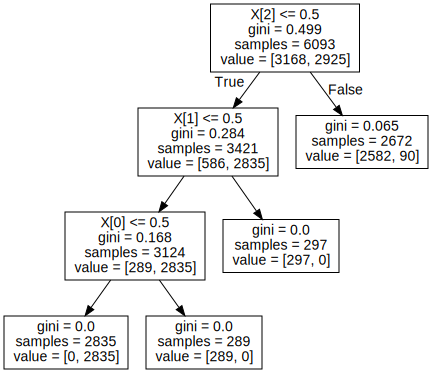

In [ ]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

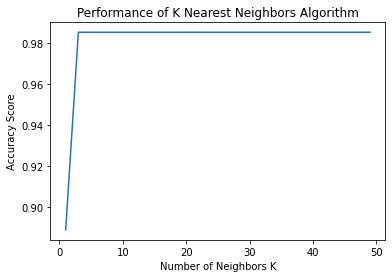

In [ ]:
cv_scores =[]
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
d_list = list(range(1,50,2))
for d in d_list:
  knn = tree.DecisionTreeClassifier(max_depth = d)
  scores = cross_val_score(knn, X_train, y_train, cv = StratifiedKFold(shuffle=True), scoring = 'accuracy')
  cv_scores.append(scores.mean())
plt.figure()
plt.title('Performance of K Nearest Neighbors Algorithm')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy Score')
plt.plot(d_list, cv_scores)

In [ ]:
best_k = d_list[cv_scores.index(max(cv_scores))]
print(best_k)

21


In [ ]:
y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)

print(accuracy)

0.9852289512555391
